# AnyoneAI - Project I

# An analysis of NBA players in the 2021/2022 season

Hi! this is the first of several projects we're going to be working on during this course. 
You will be expected to finish this on your own, but you can use the available channels on Discord to ask questions and help others. Please read the entire notebook before starting, this will give you a better idea of what you need to accomplish.

This project will rely heavily in the use of API as data sources. Contrary to most machine learning challenges and competitions, working in the industry usually requires the ML Developer to work with multiple teams and use heterogeneous sources of information to get the necessary data to solve a particular problem. Access to data is often provided through application programming interfaces (APIs), whether internal or external to the organization. It is very important to understand how to interact with APIs to collect data in our day to day work.

You might be wondering: why basketball? The main reason is availability of data.

The sport is played at a fast pace, with hundreds of plays in each single game, thousands of games in a season, and with a relatively small amount of on-court players, which gives them a lot of interactions with the ball, which in turn provides an oportunity to collect a great amount of data about each player performance.

These are the objectives of the project:
- Understanding how to query an API to create a dataset with Python and Pandas
- Learning how to cleanup a dataset and generate new fields from calculated data
- Storing the created dataset in a serialized manner
- Generating statistics about the data
- Visualizing data

## Introduction

### A brief description of basketball and the NBA

The National Basketball Association is the main basketball league in the United States of America. It currently features 30 teams from different cities, divided in 2 conferences (East and West) of 15 teams. Each team plays a total of 82 games during the regular season. After that, the 8 teams with better records from each conference are seeded in a playoff format, with the winner of each conference playing the finals to determine the eventual champion. NBA seasons usually play out between october of one year, to june of the next year, so for example the current season being played is called the 2021/2022 season.

As in most leagues in the world, the game is played 5 vs 5 players, with as many as 9 reserve players that can rotate with the starters as many times as the team wants. Games are played to 48 minutes, so the total amount of minutes of combined play time for any team in a single game with no added time is 240 minutes. If the score is tied at the end of the 48 minutes, 5 minutes of extra time are played, this continues until a winner is decided.

Even though they can play multiple positions, players are usually classified according to the following positions:

- Guards
    - Point Guards
    - Shooting Guards
- Forwards
    - Small Forwards
    - Power Forwards
- Centers

We will mainly focus on the three main positions: Guards/Forwards/Centers

### The dataset

You'll be in charge of creating our dataset. We want to create a single pandas dataframe with information about all active players in the current NBA season. 
The dataset needs to have the following structure:

- Personal Information
    - player_id (int) (INDEX) 
    - player_name (str)
    - team_name (str)
    - position (str)
    - height (int) (in centimeters) 
    - weight (float) (in kilograms)
    - country of origin (str)
    - date_of_birth (datetime)
    - age (str) (years and months)
    - years_of_experience (int) (years since entering the league)
    - Draft position (int)
- Player career statistics
    - games played (int)
    - minutes per game (float)
    - points per game (float)
    - rebounds per game (float)
    - assists per game (float)
    - steals per game (float)
    - blocks per game (float)
- Misc
    - salary in dollars (int) (contract value for this season only)
    - next_game_date (datetime)

Here is a sample of how the final result should look like:

In [1]:
import pandas as pd

sample_dict = {
    'PLAYER_NAME': {200765: 'Rajon Rondo',  203107: 'Tomas Satoransky',  204060: 'Joe Ingles'},
    'TEAM_NAME': {200765: 'Cavaliers', 203107: 'Wizards', 204060: 'Trail Blazers'},
    'POSITION': {200765: 'Guard', 203107: 'Guard', 204060: 'Forward'},
    'HEIGHT': {200765: 185, 203107: 201, 204060: 203},
    'WEIGHT': {200765: 82, 203107: 95, 204060: 100},
    'COUNTRY': {200765: 'USA', 203107: 'Czech Republic', 204060: 'Australia'},
    'BIRTHDATE': {200765: pd.Timestamp('1986-02-22 00:00:00'), 203107: pd.Timestamp('1991-10-30 00:00:00'), 204060: pd.Timestamp('1987-10-02 00:00:00')},
    'SEASON_EXP': {200765: 15, 203107: 5, 204060: 7},
    'DRAFT_NUMBER': {200765: '21', 203107: '32', 204060: 'Undrafted'},
    'GP': {200765: 957, 203107: 388, 204060: 590},
    'MIN': {200765: 29.9, 203107: 22.2, 204060: 25.7},
    'PTS': {200765: 9.8, 203107: 6.9, 204060: 8.6},
    'REB': {200765: 4.5, 203107: 2.9, 204060: 3.2},
    'AST': {200765: 7.9, 203107: 4.1, 204060: 3.8},
    'STL': {200765: 1.6, 203107: 0.8, 204060: 0.9},
    'BLK': {200765: 0.1, 203107: 0.2, 204060: 0.2},
    'GAME_DATE': {200765: pd.Timestamp('2022-04-10 00:00:00'), 203107: pd.Timestamp('2022-04-10 00:00:00'), 204060: pd.Timestamp('2022-04-10 00:00:00')},
    'SALARY': {200765: 2641691, 203107: 10468119, 204060: 14000000},
    'AGE': {200765: '36 years, 1 months, 19 days', 203107: '30 years, 5 months, 11 days', 204060: '34 years, 6 months, 8 days'}
}
pd.DataFrame(sample_dict)

,PLAYER_NAME,TEAM_NAME,POSITION,HEIGHT,WEIGHT,COUNTRY,BIRTHDATE,SEASON_EXP,DRAFT_NUMBER,GP,MIN,PTS,REB,AST,STL,BLK,GAME_DATE,SALARY,AGE
200765,Rajon Rondo,Cavaliers,Guard,185,82,USA,1986-02-22,15,21,957,29.9,9.8,4.5,7.9,1.6,0.1,2022-04-10,2641691,"36 years, 1 months, 19 days"
203107,Tomas Satoransky,Wizards,Guard,201,95,Czech Republic,1991-10-30,5,32,388,22.2,6.9,2.9,4.1,0.8,0.2,2022-04-10,10468119,"30 years, 5 months, 11 days"
204060,Joe Ingles,Trail Blazers,Forward,203,100,Australia,1987-10-02,7,Undrafted,590,25.7,8.6,3.2,3.8,0.9,0.2,2022-04-10,14000000,"34 years, 6 months, 8 days"


## Collecting information for building our dataset

In this section, we're only going to work on collecting the necessary raw data to build the required dataset. Don't worry about finishing everything here, we'll generate the appropiate fields and merge the data into a single dataframe in the next section.

To get the information, you can use any public and free API you can find, but you have to provide the code that gets the information here. We recommend using this API:
 
- https://github.com/swar/nba_api

    This is a Python library that can be used to obtain data from stats.nba.com, it provides a set of methods that abstracts you from making the http calls, but directly makes calls to nba stats page and parses the results. [Here](https://github.com/swar/nba_api/blob/master/docs/examples/Basics.ipynb) are a couple of examples on how to use it.
    

A few notes on data collection:

- Start simple. Try to get all the required information for 1 player, read the APIs documentation carefuly, then think about how to use them to collect all players data. 

- Please bear in mind that the most public APIs have some kind of rate limit, so you have to be careful about iterating on data and making lots of requests in a short amount of time (a 1 second delay between calls to the api should be enough). Once you've collected what you needed, save it to file in order to retrieve it later without calling the API again.

- A key consideration: we only want data about players that have played in the current season, so make sure to filter those out before collecting the rest of the information.

- There is at least one piece of information you're not going to find in both of those APIs: the player contract information. Again you can decide to use any source, but we recommend using information provided [here](https://www.basketball-reference.com/contracts/players.html), as it lets you export the data as a csv.  

1- Create a function to find all ACTIVE players, meaning players that are listed with a team in the 2021/2022 season. For now you only need the player id, name, and team. Save the dataframe to a csv named "nba_current_players_list.csv". The function should return the dataframe.

Hint: you should find an API method that can give you a list of players in just one call, this way we can filter those players we're interested in, and later will make calls for each specific player.

Consider dropping: 
- All players with TEAM_ID == 0
- All players with GAMES_PLAYED_FLAG == N
- Player with id 1630597 (This guy is a problem ;))

In [2]:
from nba_api.stats.endpoints import commonplayerinfo, commonallplayers, playercareerstats, playernextngames
import time
from unidecode import unidecode
import re
import pandas as pd
from datetime import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def get_and_save_players_list():
    players_f = commonallplayers.CommonAllPlayers(is_only_current_season=1).get_data_frames()[0]
    players_f = players_f[(players_f['TEAM_NAME'] != '') & (players_f['GAMES_PLAYED_FLAG'] != 'N') & (players_f['PERSON_ID'] != 1630597)]
    players_f = players_f[['PERSON_ID', 'DISPLAY_FIRST_LAST', 'TEAM_NAME']]
    return players_f

In [4]:
current_players_list = get_and_save_players_list()
players_list = list(current_players_list['PERSON_ID'])
current_players_list.to_csv("nba_current_players_list.csv")

2- Create a function to find the personal information of all players listed in the dataframe created in the previous step, and save it to a csv file named "nba_players_personal_info.csv". The function should also return the created dataframe.

OPTIONAL: iterating on a list of players and making API calls can be complex and full of errors, try a code block that handles exceptions (for example a timeout from the API) and returns the partial result before it failed, you could also save the partial information to disk.

In [5]:
def remove_jr_sr(dataframe, players_column_name):
    regex = r" Sr.$"
    regex2 = r" Jr.$"
    regex3 = r" II$"
    regex4 = r" III$"
    regex5 = r" IV$"
    regex6 = r" V$"
    subst = ""
    try:
        for i in dataframe.index:
            try:
                test_str = dataframe.loc[i, str(players_column_name)]
                result = re.sub(regex, subst, test_str, 1)
                dataframe.loc[i, str(players_column_name)] = result
                if result == test_str:
                    result = re.sub(regex2, subst, test_str, 1)
                    dataframe.loc[i,str(players_column_name)] = result
                    if result == test_str:
                        result = re.sub(regex3, subst, test_str, 1)
                        dataframe.loc[i, str(players_column_name)] = result
                        if result == test_str:
                            result = re.sub(regex4, subst, test_str, 1)
                            dataframe.loc[i, str(players_column_name)] = result
                            if result == test_str:
                                result = re.sub(regex5, subst, test_str, 1)
                                dataframe.loc[i, str(players_column_name)] = result
                                if result == test_str:
                                    result = re.sub(regex6, subst, test_str, 1)
                                    dataframe.loc[i, str(players_column_name)] = result
            except:
                pass
    except:
        for i in range(len(dataframe)):
            try:
                test_str = dataframe.loc[i, str(players_column_name)]
                result = re.sub(regex, subst, test_str, 1)
                dataframe.loc[i, str(players_column_name)] = result
                if result == test_str:
                    result = re.sub(regex2, subst, test_str, 1)
                    dataframe.loc[i,str(players_column_name)] = result
                    if result == test_str:
                        result = re.sub(regex3, subst, test_str, 1)
                        dataframe.loc[i, str(players_column_name)] = result
                        if result == test_str:
                            result = re.sub(regex4, subst, test_str, 1)
                            dataframe.loc[i, str(players_column_name)] = result
                            if result == test_str:
                                result = re.sub(regex5, subst, test_str, 1)
                                dataframe.loc[i, str(players_column_name)] = result
                                if result == test_str:
                                    result = re.sub(regex6, subst, test_str, 1)
                                    dataframe.loc[i, str(players_column_name)] = result
            except:
                pass
    return dataframe

In [6]:
def get_players_personal_information():
    all_players = pd.DataFrame()
    a = 0
    try:
        for player in players_list:
            player_info = commonplayerinfo.CommonPlayerInfo(player_id=player).get_data_frames()
            player_info = player_info[0]
            all_players = pd.concat([all_players,player_info])
            time.sleep(0.8)
            a += 1
            print(f'Personal Info - Iteration N°:{a}')

    except:
        print('TimeOut. Incomplete file will be saved anyways')
        pass

    def personal_info_cleanse(all_players_c):
        all_players_c = all_players_c.drop(['DISPLAY_FIRST_LAST', 'DISPLAY_LAST_COMMA_FIRST', 'DISPLAY_FI_LAST', 'PLAYER_SLUG',
                            'SCHOOL', 'LAST_AFFILIATION', 'SEASON_EXP', 'JERSEY', 'ROSTERSTATUS', 'TEAM_ID',
                            'TEAM_ABBREVIATION', 'TEAM_CODE', 'TEAM_CITY', 'PLAYERCODE', 'DLEAGUE_FLAG',
                            'NBA_FLAG', 'GAMES_PLAYED_FLAG', 'DRAFT_YEAR', 'DRAFT_ROUND', 'GREATEST_75_FLAG',
                            'GAMES_PLAYED_CURRENT_SEASON_FLAG'], axis=1)
        all_players_c['PLAYER_NAME'] = all_players_c['FIRST_NAME'] + ' ' + all_players_c[
            'LAST_NAME']
        all_players_c = all_players_c.drop(['FIRST_NAME', 'LAST_NAME'], axis=1)
        all_players_c.set_index('PERSON_ID', inplace=True)
        aux_player_names = list(all_players_c.loc[:, 'PLAYER_NAME'])
        all_players_c.insert(0, 'PLAYER_NAME', aux_player_names, allow_duplicates=True)
        all_players_c = all_players_c.iloc[:, 0:-1]
        all_players_c['SEASON_EXP'] = all_players_c['TO_YEAR'] - all_players_c['FROM_YEAR']
        all_players_c = all_players_c[
            ["PLAYER_NAME", "TEAM_NAME", "POSITION", "HEIGHT", "WEIGHT", "COUNTRY",
             "BIRTHDATE", "SEASON_EXP", "DRAFT_NUMBER"]]
        all_players_c = all_players_c.astype({'PLAYER_NAME': 'string', 'TEAM_NAME': 'string', 'POSITION': 'string',
                                              'COUNTRY':'string', 'BIRTHDATE':'datetime64', 'SEASON_EXP':'int64'})
        return all_players_c

    all_players = remove_jr_sr(personal_info_cleanse(all_players), 'PLAYER_NAME')
    return all_players       

In [7]:
players_personal_info = get_players_personal_information()
players_personal_info.to_csv("nba_players_personal_info.csv")

Personal Info - Iteration N°:1
Personal Info - Iteration N°:2
Personal Info - Iteration N°:3
Personal Info - Iteration N°:4
Personal Info - Iteration N°:5
Personal Info - Iteration N°:6
Personal Info - Iteration N°:7
Personal Info - Iteration N°:8
Personal Info - Iteration N°:9
Personal Info - Iteration N°:10
Personal Info - Iteration N°:11
Personal Info - Iteration N°:12
Personal Info - Iteration N°:13
Personal Info - Iteration N°:14
Personal Info - Iteration N°:15
Personal Info - Iteration N°:16
Personal Info - Iteration N°:17
Personal Info - Iteration N°:18
Personal Info - Iteration N°:19
Personal Info - Iteration N°:20
Personal Info - Iteration N°:21
Personal Info - Iteration N°:22
Personal Info - Iteration N°:23
Personal Info - Iteration N°:24
Personal Info - Iteration N°:25
Personal Info - Iteration N°:26
Personal Info - Iteration N°:27
Personal Info - Iteration N°:28
Personal Info - Iteration N°:29
Personal Info - Iteration N°:30
Personal Info - Iteration N°:31
Personal Info - I

3- Create a function to find players career statistics, store the information in a CSV file called "nba_players_career_stats.csv"

In [10]:
def get_players_career_stats():
    all_players = pd.DataFrame()
    a = 0
    try:
        for player in players_list:
            player_info = playercareerstats.PlayerCareerStats(player_id=player, per_mode36= 'PerGame' ).get_data_frames()
            player_info = player_info[1]
            all_players = pd.concat([all_players,player_info])
            time.sleep(0.8)
            a += 1
            print(f'Career stats - Iteration N°:{a}')
    except:
        print('TimeOut. Incomplete file will be saved anyways')
        pass

    def career_stats_cleanse(players_career_stats_d):
        players_career_stats_d = players_career_stats_d.set_index('PLAYER_ID')
        players_career_stats_d = players_career_stats_d.drop(['LEAGUE_ID', 'Team_ID', 'GS', 'FGM',
                                                          'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM',
                                                          'FTA', 'FT_PCT', 'OREB', 'DREB', 'TOV',
                                                          'PF'], axis=1)
        players_career_stats_d = players_career_stats_d[["GP", "MIN", "PTS", "REB", "AST", "STL", "BLK"]]
        return players_career_stats_d

    all_players = career_stats_cleanse(all_players)
    return all_players

In [46]:
players_career_stats = get_players_career_stats()
players_career_stats.to_csv("nba_players_career_stats.csv")

Career stats - Iteration N°:1
Career stats - Iteration N°:2
Career stats - Iteration N°:3
Career stats - Iteration N°:4
Career stats - Iteration N°:5
Career stats - Iteration N°:6
Career stats - Iteration N°:7
Career stats - Iteration N°:8
Career stats - Iteration N°:9
Career stats - Iteration N°:10
Career stats - Iteration N°:11
Career stats - Iteration N°:12
Career stats - Iteration N°:13
Career stats - Iteration N°:14
Career stats - Iteration N°:15
Career stats - Iteration N°:16
Career stats - Iteration N°:17
Career stats - Iteration N°:18
Career stats - Iteration N°:19
Career stats - Iteration N°:20
Career stats - Iteration N°:21
Career stats - Iteration N°:22
Career stats - Iteration N°:23
Career stats - Iteration N°:24
Career stats - Iteration N°:25
Career stats - Iteration N°:26
Career stats - Iteration N°:27
Career stats - Iteration N°:28
Career stats - Iteration N°:29
Career stats - Iteration N°:30
Career stats - Iteration N°:31
Career stats - Iteration N°:32
Career stats - It

4- Create a function to find players next games and save the information to a csv call "nba_players_next_game.csv"

In [12]:
def get_players_next_game():
    all_next_games = pd.DataFrame()
    a = 0
    try:
        for player in players_list:
            try:
                next_games = playernextngames.PlayerNextNGames(player_id=player).get_data_frames()
                next_games = next_games[0]
                all_next_games = pd.concat([all_next_games,next_games])
                time.sleep(0.8)
                a += 1
                print(f'Next games - Iteration N°:{a}')
            except:
                print(f'Player n°: {player} not found')
                continue
    except:
        print('TimeOut. Incomplete file will be saved anyways')
        pass

    if all_next_games.empty:
        print('Season just closed. There are no next games.')
    else:
        pass
    return all_next_games

In [13]:
players_next_game = get_players_next_game()
players_next_game.to_csv("nba_players_next_game.csv")

Player n°: 1630173 not found
Next games - Iteration N°:1
Next games - Iteration N°:2
Next games - Iteration N°:3
Player n°: 200746 not found
Next games - Iteration N°:4
Next games - Iteration N°:5
Next games - Iteration N°:6
Next games - Iteration N°:7
Next games - Iteration N°:8
Next games - Iteration N°:9
Next games - Iteration N°:10
Next games - Iteration N°:11
Player n°: 1630175 not found
Next games - Iteration N°:12
Player n°: 1627853 not found
Next games - Iteration N°:13
Next games - Iteration N°:14
Next games - Iteration N°:15
Next games - Iteration N°:16
Next games - Iteration N°:17
Player n°: 1630163 not found
Next games - Iteration N°:18
Next games - Iteration N°:19
Player n°: 1630217 not found
Next games - Iteration N°:20
Next games - Iteration N°:21
Player n°: 1630567 not found
Next games - Iteration N°:22
Next games - Iteration N°:23
Next games - Iteration N°:24
Next games - Iteration N°:25
Next games - Iteration N°:26
Next games - Iteration N°:27
Next games - Iteration N

5- Create a function to find players salary for this season, save the information to a csv called "nba_players_salary.csv". Make sure the players names format match the ones in the API, otherwise you won't be able to merge the data later.

Hint: Using data from the Basketball Reference page, you will have to solve 2 kinds of problems, duplicated values (for which you should keep just the first value) and players names not matching with the ones from the API. The latter problem has multiple causes, one of them is that some names are written with non ascii characters (there are libraries for dealing with that).

In [16]:
def get_nba_players_salaries(csv_file_path):
    salaries_f = pd.read_csv(csv_file_path, encoding= 'utf-8')
    salaries_f = salaries_f.drop_duplicates(subset=['Unnamed: 1'])
    salaries_f = salaries_f.reset_index(drop=True)
    salaries_f[['Player2', 'Discard']] = salaries_f['Unnamed: 1'].str.split('\\', expand=True)
    salaries_f = salaries_f.drop(['Unnamed: 1', 'Discard'], axis=1)
    salaries_f.columns = salaries_f.iloc[0]
    salaries_f = salaries_f.drop([0], axis=0)
    valores_player = list(salaries_f.loc[:, 'Player'])
    salaries_f.insert(1, 'Player2', valores_player, allow_duplicates=True)
    salaries_f = salaries_f.drop(['Player', 'Rk', 'Tm', '2022-23', '2023-24', '2024-25', '2025-26', '2026-27',
                              'Signed Using', 'Guaranteed'], axis=1)
    salaries_f = salaries_f.rename(columns={'Player2': 'Player'})
    salaries_f['2021-22'] = salaries_f['2021-22'].str.replace('$', '')
    salaries_f['2021-22'] = salaries_f['2021-22'].str.replace('?', '')
    salaries_f = salaries_f.fillna(0)
    salaries_f = remove_jr_sr(salaries_f, 'Player')
    salaries_f['2021-22'] = salaries_f['2021-22'].astype('int64')
    salaries_f['Player'] = salaries_f['Player'].astype('string')
    salaries_f['Player'] = salaries_f['Player'].apply(unidecode)

    for i, row in salaries_f.iterrows():
        try:
            salaries_f.loc[i, 'PLAYER_ID'] = int(players_personal_info.index[players_personal_info['PLAYER_NAME'] == row['Player']][0])
        except:
            deleted_player = salaries_f.loc[i,'Player']
            salaries_f = salaries_f.drop(index= i)
            print(f'{deleted_player} is not active. Player deleted')
            pass

    salaries_f = salaries_f.set_index('PLAYER_ID')
    return salaries_f

In [18]:
players_salaries = get_nba_players_salaries("contracts.csv")
players_salaries.to_csv("nba_players_salary.csv")

<ipython-input-16-1cfdb6cfa686>:14: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  salaries_f['2021-22'] = salaries_f['2021-22'].str.replace('$', '')
<ipython-input-16-1cfdb6cfa686>:15: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  salaries_f['2021-22'] = salaries_f['2021-22'].str.replace('?', '')


Joakim Noah is not active. Player deleted
Timofey Mozgov is not active. Player deleted
Ryan Anderson is not active. Player deleted
Luol Deng is not active. Player deleted
Jon Leuer is not active. Player deleted
Michael Carter-Williams is not active. Player deleted
Andrew Nicholson is not active. Player deleted
E'Twaun Moore is not active. Player deleted
Trevor Ariza is not active. Player deleted
Enes Freedom is not active. Player deleted
James Johnson is not active. Player deleted
Cody Zeller is not active. Player deleted
Solomon Hill is not active. Player deleted
Monta Ellis is not active. Player deleted
Frank Kaminsky is not active. Player deleted
Abdel Nader is not active. Player deleted
DeAndre' Bembry is not active. Player deleted
PJ Dozier is not active. Player deleted
Larry Sanders is not active. Player deleted
Dennis Smith is not active. Player deleted
Semi Ojeleye is not active. Player deleted
KZ Okpala is not active. Player deleted
Drew Eubanks is not active. Player deleted
G

6- Create a function to merge the created dataframes: players_personal_info, players_career_stats, players_next_game, players_salaries. For each dataframe, select only the subset of columns needed to create the dataset described in section "The Dataset"

    - Players info: "PLAYER_NAME", "TEAM_NAME", "POSITION", "HEIGHT", "WEIGHT", "COUNTRY", "BIRTHDATE", "SEASON_EXP", "DRAFT_NUMBER"
    - Players stats: "GP", "MIN", "PTS", "REB", "AST", "STL", "BLK"
    - Misc: "GAME_DATE", "SALARY"

Save the result to a csv called "raw_nba_players_dataset.csv"

Hint: Before merging the data, you should make sure all four dataframes have the same length, are indexed by PERSON_ID and have the same keys

In [19]:
def merge_dataframes(personal_info, career_stats, next_game, salaries):
    raw_players_dataset1 = pd.merge(personal_info, career_stats, left_index=True, right_index=True)
    raw_players_dataset2 = pd.merge(raw_players_dataset1, salaries, left_index=True, right_index=True)
    raw_players_dataset3 = pd.merge(raw_players_dataset2, next_game, left_index=True, right_index=True) if not next_game.empty else raw_players_dataset2
    raw_players_dataset3 = raw_players_dataset3.drop(['Player'], axis=1)
    raw_players_dataset3 = raw_players_dataset3.rename(columns={'2021-22':'SALARY'})
    return raw_players_dataset3

In [20]:
raw_players_dataset = merge_dataframes(players_personal_info, players_career_stats, players_next_game, players_salaries)
raw_players_dataset.to_csv("raw_nba_players_dataset.csv")

## Data Cleaning and Preprocessing

There are several steps that you will have to follow, depending on where you have collected the data some information might be missing.  

- Height and weight might need to be converted to the metric system
- Players that have no team assigned should be removed from the dataset
- Players with no contracts (meaning they don't have a salary defined) should be removed from the dataset
- If the "position" data is ambiguous (listed at multiple positions), use the first value
- If the player does not have height or weight data, use the average for its position as its value
- In order to fill the column next_game_date, just consider the date of the next game of each player's team. 

1- Create a copy of your dataset named "working_df", remove all players with no teams or salary

In [21]:
def copy_and_delete_nan(players_dataset):
    players_dataset_c = players_dataset.copy()
    players_dataset_c = players_dataset_c[(~players_dataset_c['TEAM_NAME'].isnull()) | (~players_dataset_c['SALARY'].isnull())]
    return players_dataset_c

2- Cast Salary, Birthday and Game Date columns to its corresponding type (int, datetime) 

In [22]:
def cast_columns(working_df):
    working_df['SALARY'] = working_df['SALARY'].astype('int64')
    working_df['BIRTHDATE'] = working_df['BIRTHDATE'].astype('datetime64')
    return working_df

3- Create a function that converts the height column from height in feet and inches to centimeters

In [23]:
def convert_height_column(working_df):
    working_df['HEIGHT'] = (working_df['HEIGHT'].str.replace('-', '.')).astype('float64')
    working_df['HEIGHT'] = round(working_df['HEIGHT'] * 30.48, 2)
    return working_df

4- Create a function that converts the weight column from pounds to kilograms

In [24]:
def convert_weight_column(working_df):
    working_df['WEIGHT'] = round(working_df['WEIGHT'].astype('float64') / 2.20462, 2)
    return working_df

5- Create a function that calculates the age in (years, months, days) and saves it in a new string column, example: "22 years, 5 months, 25 days" 

In [25]:
def add_age_column(working_df):
    working_df['AGE'] = (dt.now() - working_df['BIRTHDATE'])
    days_4_years = working_df['AGE'].astype('string')
    days_4_years = days_4_years.str.split('days', expand=True)[0]
    years_mod = days_4_years.astype('int64') / 365
    years = (days_4_years.astype('int64') / 365).apply(np.floor).astype('int64')
    months = (((days_4_years.astype('int64') / 365) - years) * 12).apply(np.floor).astype('int64')
    days = (((((days_4_years.astype('int64') / 365) - years) * 12) - months) * 30).apply(np.floor).astype('int64')
    years_months_days = pd.concat([years,months,days], axis=1).astype('string')
    working_df['AGE'] = (years_months_days.iloc[:,0] + ' years, ' + years_months_days.iloc[:,1] + ' months, '
                         + years_months_days.iloc[:,2] + ' days')
    return working_df, years_mod

6- Create a function that takes care of the disambiguation of the "POSITION" column. Should replace all positions that are mixed with the first one listed.

In [26]:
def update_position(working_df):
    split_aux = working_df['POSITION'].str.split('-', expand=True)
    split_aux = split_aux.iloc[:,0]
    working_df['POSITION'] = split_aux
    return working_df

In [47]:
raw_players_dataset = merge_dataframes(players_personal_info, players_career_stats, players_next_game, players_salaries)
working_df = copy_and_delete_nan(raw_players_dataset)
working_df = cast_columns(working_df)
working_df = convert_height_column(working_df)
working_df = convert_weight_column(working_df)
working_df = add_age_column(working_df)[0]
years_mod = pd.DataFrame({'years':add_age_column(working_df)[1]})
working_df = update_position(working_df)
working_df

,PLAYER_NAME,TEAM_NAME,POSITION,HEIGHT,WEIGHT,COUNTRY,BIRTHDATE,SEASON_EXP,DRAFT_NUMBER,GP,MIN,PTS,REB,AST,STL,BLK,SALARY,AGE
1630173,Precious Achiuwa,Raptors,Forward,207.26,102.06,Nigeria,1999-09-19,1,20,134,18.4,7.2,5.1,0.8,0.4,0.5,2711280,"22 years, 7 months, 8 days"
203500,Steven Adams,Grizzlies,Center,186.23,120.20,New Zealand,1993-07-20,8,12,664,26.8,9.3,8.0,1.5,0.9,0.9,17073171,"28 years, 9 months, 10 days"
1628389,Bam Adebayo,Heat,Center,210.31,115.67,USA,1997-07-18,4,14,343,28.2,13.5,8.3,3.5,1.0,0.9,28103550,"24 years, 9 months, 11 days"
1630583,Santi Aldama,Grizzlies,Forward,186.23,97.52,Spain,2001-01-10,0,30,32,11.2,4.1,2.7,0.7,0.2,0.3,1994520,"21 years, 3 months, 16 days"
200746,LaMarcus Aldridge,Nets,Center,186.23,113.40,USA,1985-07-19,15,2,1076,33.7,19.1,8.1,1.9,0.7,1.1,2641691,"36 years, 9 months, 13 days"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1630589,Moses Wright,Mavericks,Forward,207.26,102.51,USA,1998-12-23,0,Undrafted,4,3.7,1.3,0.8,0.5,0.0,0.3,0,"23 years, 4 months, 5 days"
201152,Thaddeus Young,Raptors,Forward,207.26,106.59,USA,1988-06-21,14,12,1085,29.3,12.8,5.8,1.8,1.4,0.4,14190000,"33 years, 10 months, 9 days"
1629027,Trae Young,Hawks,Guard,185.93,74.39,USA,1998-09-19,3,5,280,33.6,25.3,3.9,9.1,0.9,0.2,8326471,"23 years, 7 months, 8 days"
1630209,Omer Yurtseven,Heat,Center,186.23,124.74,Turkey,1998-06-19,1,Undrafted,56,12.6,5.3,5.3,0.9,0.3,0.4,1489065,"23 years, 10 months, 9 days"


7- Review that the working dataset has all requested columns with its corresponding datatypes and save it as a csv with name "nba_players_processed_dataset.csv"

In [28]:
working_df.to_csv("nba_players_processed_dataset.csv")

## Analyzing and Visualizing data

Now that we have the data, let's do some work

1- Calculate and print the following metrics:

    - General metrics:
        - Total number of players
        - Number of USA born players
        - Number of foreign players
        - Number of players per position
        - Number of players per team
        - Number of rookies (first year players)
    - Players description
        - Average player age (in years)
        - Youngest player age (years and days, i.e: 18 years and 16 days)
        - Oldest player age (years and days, i.e: 40 years and 160 days)
        - Min and Max players height
        - Average height of players per position
    - Contracts
        - Min and Max salary of all players
        - Mean and Median salary of all players

Bonus: if you can, calculate how many players retired between the end of the 2020-2021 season and the start of the 2021-22 season.

In [39]:
def general_metrics(working_df):
    usa_players = working_df[working_df['COUNTRY']=='USA']
    per_position = working_df.groupby(by=['POSITION']).count()
    center = per_position.loc['Center', 'PLAYER_NAME']
    forward = per_position.loc['Forward', 'PLAYER_NAME']
    guard = per_position.loc['Guard', 'PLAYER_NAME']
    rookies = working_df[working_df['SEASON_EXP']==0]

    per_team = (working_df.groupby(by=['TEAM_NAME']).count())
    per_team = per_team['PLAYER_NAME'].copy()
    per_team = per_team.reset_index()
    per_team.columns = ['Team','N° Players']

    print('==========================================')
    print(f'Total amount of players: {len(working_df)}')
    print(f'Number of USA born players: {len(usa_players)}')
    print(f'Number of foreign players: {len(working_df)-len(usa_players)}')
    print(f'Number of Center Players: {center}')
    print(f'Number of Forward Players: {forward}')
    print(f'Number of Guard Players: {guard}')
    print(f'Number of Rookies: {len(rookies)}')
    print('==========================================')
    print(per_team)
general_metrics(working_df)

Total amount of players: 470
Number of USA born players: 360
Number of foreign players: 110
Number of Center Players: 60
Number of Forward Players: 186
Number of Guard Players: 224
Number of Rookies: 69
             Team  N° Players
0           76ers          16
1           Bucks          14
2           Bulls          17
3       Cavaliers          17
4         Celtics          16
5        Clippers          15
6       Grizzlies          16
7           Hawks          16
8            Heat          15
9         Hornets          15
10           Jazz          16
11          Kings          15
12         Knicks          15
13         Lakers          16
14          Magic          16
15      Mavericks          17
16           Nets          15
17        Nuggets          15
18         Pacers          16
19       Pelicans          17
20        Pistons          15
21        Raptors          15
22        Rockets          16
23          Spurs          16
24           Suns          15
25        Thunder

In [40]:
def players_description(working_df, years_mod):
    avg_age = int(years_mod.mean())
    youngest_index = years_mod.index[years_mod['years'] == years_mod['years'].min()][0]
    youngest_player = working_df.loc[youngest_index, 'AGE']
    oldest_index = years_mod.index[years_mod['years'] == years_mod['years'].max()][0]
    oldest_player = working_df.loc[oldest_index, 'AGE']
    min_height = working_df['HEIGHT'].min()
    max_height = working_df['HEIGHT'].max()
    avg_height_per_pos = pd.DataFrame({'avg_height':working_df.groupby(by='POSITION').mean()['HEIGHT']})
    center = round(avg_height_per_pos.loc['Center','avg_height'], 2)
    forward = round(avg_height_per_pos.loc['Forward','avg_height'], 2)
    guard = round(avg_height_per_pos.loc['Guard','avg_height'], 2)

    print('==========================================')
    print(f'Average player age: {avg_age}')
    print(f'Youngest player age: {youngest_player}')
    print(f'Oldest player age: {oldest_player}')
    print(f'Min Height: {min_height}')
    print(f'Max Height: {max_height}')
    print(f'Average Height Center: {center}')
    print(f'Average Height Forward: {forward}')
    print(f'Average Height Guard: {guard}')
    print('==========================================')
players_description(working_df, years_mod)

Average player age: 26
Youngest player age: 19 years, 4 months, 3 days
Oldest player age: 41 years, 10 months, 23 days
Min Height: 155.45
Max Height: 222.5
Average Height Center: 199.78
Average Height Forward: 202.43
Average Height Guard: 193.7


In [42]:
def contracts(working_df):
    min_salary = int(working_df['SALARY'][working_df['SALARY'] != 0].min())
    max_salary = int(working_df['SALARY'].max())
    mean_salary = int(working_df['SALARY'].mean())
    median_salary = int(working_df['SALARY'].median())
    print('==========================================')
    print(f'Min Salary: {min_salary}')
    print(f'Max Salary: {max_salary}')
    print(f'Mean Salary: {mean_salary}')
    print(f'Median Salary: {median_salary}')
    print('==========================================')
contracts(working_df)

Min Salary: 5318
Max Salary: 45780966
Mean Salary: 8339334
Median Salary: 4071299


2- Plot the relationship between scoring (points per game) and salary of all players, the players positions should also be visible.

In [33]:
new_df = working_df[working_df['SALARY'] != 0]
new_df = new_df.astype({'SALARY':'int64', 'PTS':'float64'})
new_df2 = new_df[new_df['SEASON_EXP'] > 4]

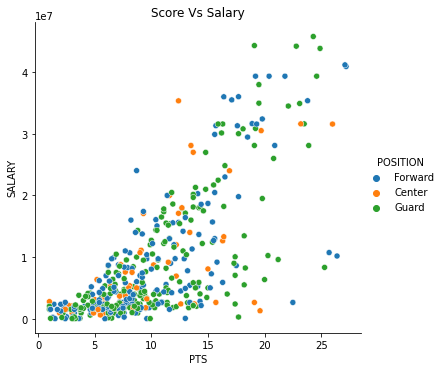

In [34]:
sns.relplot(x='PTS', y='SALARY', data=new_df, hue='POSITION').set(title='Score Vs Salary')
plt.show()

3- Now plot assists-vs-salary and rebounding-vs-salary

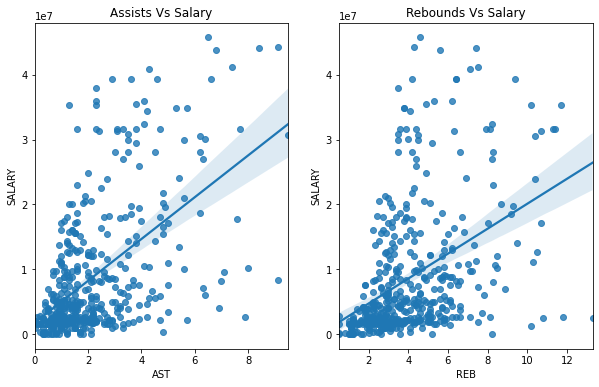

In [35]:
fig, axs = plt.subplots(ncols=2, figsize=(10,6))
sns.regplot(x='AST', y='SALARY', data=new_df, ax=axs[0]).set(title='Assists Vs Salary')
sns.regplot(x='REB', y='SALARY', data=new_df, ax=axs[1]).set(title='Rebounds Vs Salary')
plt.show()

4- When NBA players enter the league, they have low value salaries during what is called their "rookie contract". This means that it doesn't matter how well the player performs, they can't have large salaries. This can distort our understanding of how much teams value each skill, as a player could score 50 points a game and still earn just a couple of millions. So, lets now plot points, assists and rebounding vs salary, but only for players that have more than 4 years of experience (the typical length of a rookie contract)

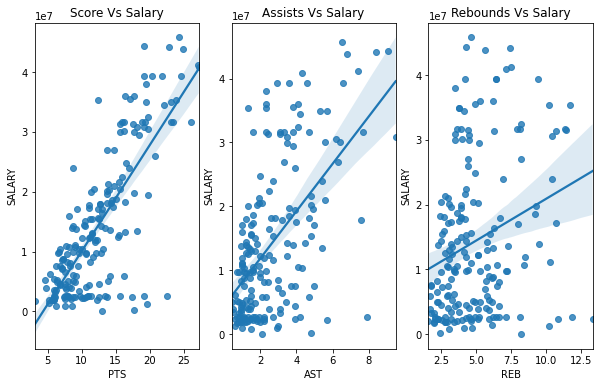

In [36]:
fig, axs = plt.subplots(ncols=3, figsize=(10,6))
sns.regplot(x='PTS', y='SALARY', data=new_df2, ax=axs[0]).set(title='Score Vs Salary')
sns.regplot(x='AST', y='SALARY', data=new_df2, ax=axs[1]).set(title='Assists Vs Salary')
sns.regplot(x='REB', y='SALARY', data=new_df2, ax=axs[2]).set(title='Rebounds Vs Salary')
plt.show()

5- Plot the scoring average grouped by position, we want to be able to see median, quartiles, etc 

C:\Users\Mengo\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


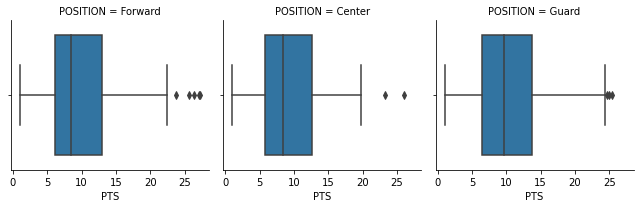

In [37]:
g = sns.FacetGrid(data=new_df, col='POSITION').set(title='Scoring per position')
g.map(sns.boxplot, 'PTS')
plt.show()

6- Plot the Height distribution of all players

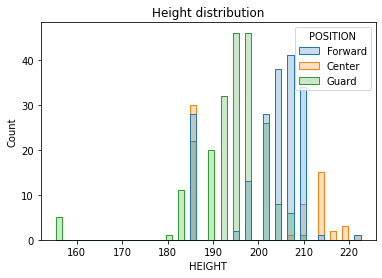

In [38]:
sns.histplot(data=working_df, x='HEIGHT', bins=50, hue='POSITION', element='step').set(title='Height distribution')
plt.show()